제안 7: 지역별 행복 점수 클러스터링
문제 정의: 지역(region)별 행복 점수(happyScore)를 클러스터링하여 유사한 행복 수준을 가진 지역 그룹을 식별합니다.
 배경: 유사한 특성을 가진 지역들을 그룹화하여 특정 그룹에 적합한 정책을 설계할 수 있습니다.

In [74]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd 
data_df = pd.read_csv('../../datasets/happyscore_income.csv')
data_df.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


### 인싸이트 : 지역(region)별 행복 점수(happyScore) 는
- income_inequality 는 상관관계가 낮다. 상관계수 : -0.10
- GDP, avg_income, median_income 따라 간다. 상관계수 : 0.74,0.73,0.70

#### 결론 : 지역(region)별 행복 점수(happyScore) 를 높게 하기 위해서는
GDP, income 을 높게 만들기 위해 경제 성장에 집중해야 한다.
다만, 지역별 응답율이 고르지 못한점이 우려된다.

In [75]:
data_df.groupby('region')['happyScore'].mean()

region
'Australia and New Zealand'          7.284000
'Central and Eastern Europe'         5.347696
'Eastern Asia'                       5.333667
'Latin America and Caribbean'        6.224125
'Middle East and Northern Africa'    5.409600
'North America'                      7.273000
'Southeastern Asia'                  5.250286
'Southern Asia'                      4.647600
'Sub-Saharan Africa'                 4.196500
'Western Europe'                     6.762368
Name: happyScore, dtype: float64

In [76]:
# 1. region별 평균 happyScore 계산
region_happy = data_df.groupby('region')['happyScore'].mean()

# 2. 각 데이터에 해당 region의 평균 happyScore 할당
data_df['region_happy_avg'] = data_df['region'].map(region_happy)

# 3. region 평균 기준으로 구간 나누기
bins = [0, 5, 6, 7, 8]
labels = ['4', '5', '6', '7']
data_df['region_happy_group'] = pd.cut(data_df['region_happy_avg'], 
                                      bins=bins, 
                                      labels=labels)

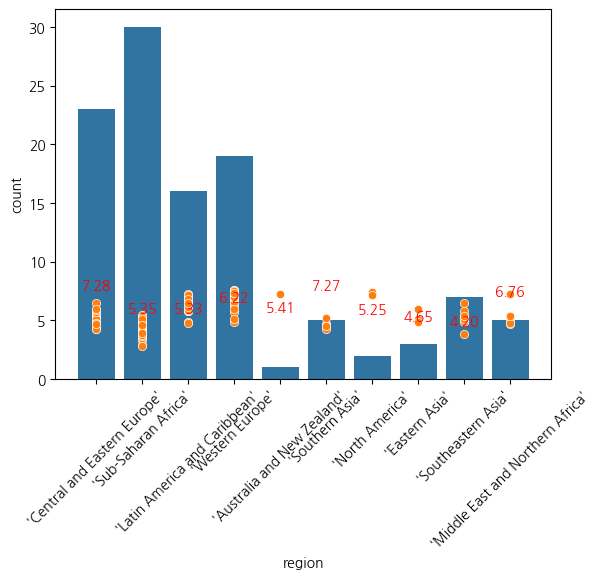

In [77]:
sns.countplot(data=data_df, x='region')
sns.scatterplot(x='region', y='happyScore', data=data_df)
# 평균값 계산
region_means = data_df.groupby('region')['happyScore'].mean()

# 평균값 표시 (점과 텍스트)
for idx, (region, avg) in enumerate(region_means.items()):
    # plt.plot(idx, avg, 'rs', markersize=10)
    plt.text(idx, avg+0.1, f'{avg:.2f}', 
             ha='center', va='bottom', 
             color='red')
plt.xticks(rotation=45) 
plt.show()

지역 평균 행복도 구간별 평균값:
                         GDP
region_happy_group          
4                   0.427963
5                   0.930207
6                   1.116313
7                   1.351460


/tmp/ipykernel_30675/1151257646.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis = data_df.groupby('region_happy_group')[['GDP']].mean()


<Figure size 1200x600 with 0 Axes>

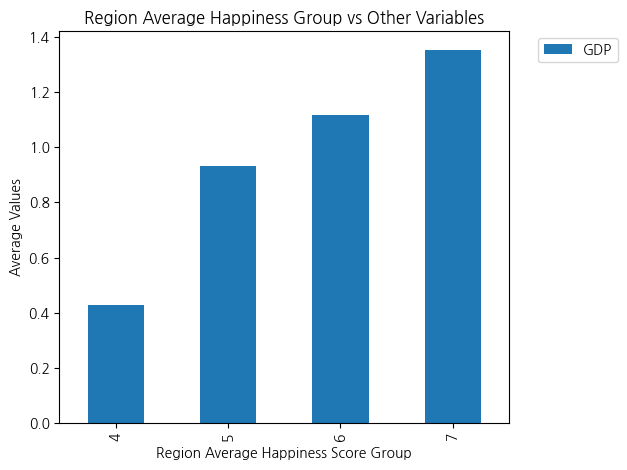

In [78]:
# 4. 구간별 분석
analysis = data_df.groupby('region_happy_group')[['GDP']].mean()

print("지역 평균 행복도 구간별 평균값:")
print(analysis)

# 5. 시각화
plt.figure(figsize=(12, 6))
analysis.plot(kind='bar')
plt.title('Region Average Happiness Group vs Other Variables')
plt.xlabel('Region Average Happiness Score Group')
plt.ylabel('Average Values')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

지역 평균 행복도 구간별 평균값:
                    income_inequality
region_happy_group                   
4                           41.866067
5                           34.124641
6                           39.776077
7                           36.721667


/tmp/ipykernel_30675/3808788840.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis = data_df.groupby('region_happy_group')[[


<Figure size 1200x600 with 0 Axes>

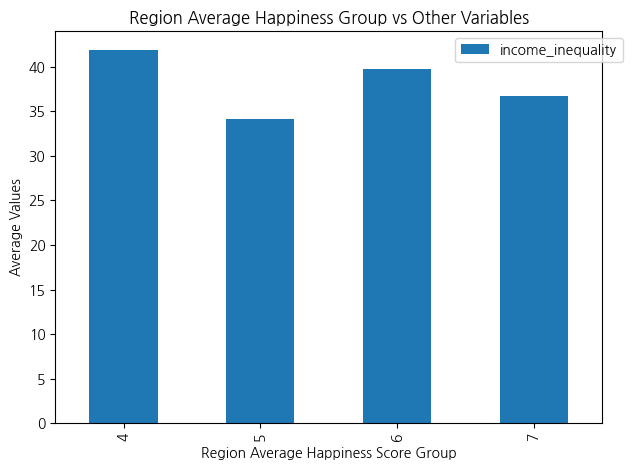

In [79]:
# 4. 구간별 분석
analysis = data_df.groupby('region_happy_group')[[
                                                 'income_inequality']].mean()

print("지역 평균 행복도 구간별 평균값:")
print(analysis)

# 5. 시각화
plt.figure(figsize=(12, 6))
analysis.plot(kind='bar')
plt.title('Region Average Happiness Group vs Other Variables')
plt.xlabel('Region Average Happiness Score Group')
plt.ylabel('Average Values')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

/tmp/ipykernel_30675/1159974236.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis = data_df.groupby('region_happy_group')[[


지역 평균 행복도 구간별 평균값:
                      avg_income  median_income
region_happy_group                             
4                    1445.740686     991.187086
5                    5047.746494    4148.629429
6                   11699.866755    9505.902925
7                   21078.260000   16866.840000


<Figure size 1200x600 with 0 Axes>

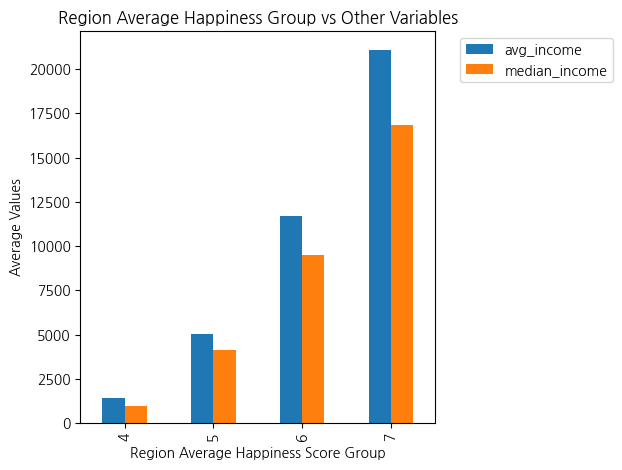

In [80]:
# 4. 구간별 분석
analysis = data_df.groupby('region_happy_group')[[
                                                 'avg_income',
                                                 'median_income']].mean()

print("지역 평균 행복도 구간별 평균값:")
print(analysis)

# 5. 시각화
plt.figure(figsize=(12, 6))
analysis.plot(kind='bar')
plt.title('Region Average Happiness Group vs Other Variables')
plt.xlabel('Region Average Happiness Score Group')
plt.ylabel('Average Values')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [81]:
# - income_inequality 는 상관관계가 낮다. 
# - GDP, avg_income, median_income 따라 간다.
data_df[['income_inequality', 'avg_income', 'median_income',
         'GDP', 'region_happy_group']].corr()


,income_inequality,avg_income,median_income,GDP,region_happy_group
income_inequality,1.000000,-0.382587,-0.449053,-0.303204,-0.104961
avg_income,-0.382587,1.000000,0.995605,0.814024,0.727339
median_income,-0.449053,0.995605,1.000000,0.797905,0.695091
GDP,-0.303204,0.814024,0.797905,1.000000,0.739004
region_happy_group,-0.104961,0.727339,0.695091,0.739004,1.000000


제안 4: GDP와 소득 불평등이 행복 점수에 미치는 영향 분석
문제 정의: GDP와 소득 불평등(income_inequality)이 행복 점수(happyScore)에 미치는 영향을 다변량 회귀 분석을 통해 확인합니다.
 배경: 경제 성장과 소득 분배 정책이 행복에 미치는 영향을 탐구하여 실효성 있는 정책 방향을 제시할 수 있습니다.

### 인싸이트 : GDP와 소득 불평등(income_inequality)이 행복 점수(happyScore)에 미치는 영향은
- 소득 불평등은 행복점수와 상관계수가 -0.18 으로 낮은 음의 상관 관계가 있다. 
- GDP는 행복점수와 상관계수가 0.79 으로 강한 양의 상관관계가 있다.

#### 결론 : 경제 성장과 소득 분배 정책이 행복에 미치는 영향
소득 분배 정책 보다는 경제 성장에 집중하는 것이 행복 점수가 높게 나오게 하는 요소이다.

In [82]:
data_df[['income_inequality', 'happyScore', 'GDP']].corr()

,income_inequality,happyScore,GDP
income_inequality,1.000000,-0.187222,-0.303204
happyScore,-0.187222,1.000000,0.790061
GDP,-0.303204,0.790061,1.000000


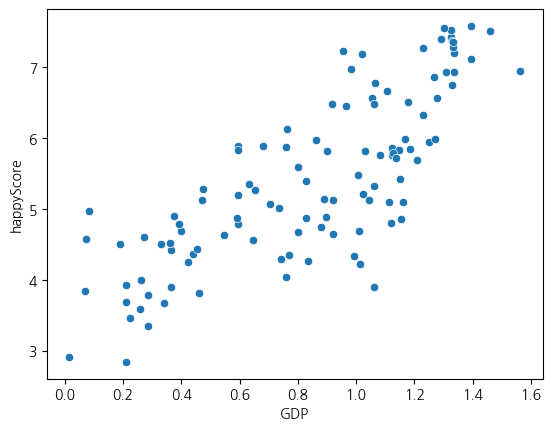

In [83]:
sns.scatterplot(data=data_df,y='happyScore',x='GDP')
plt.show()

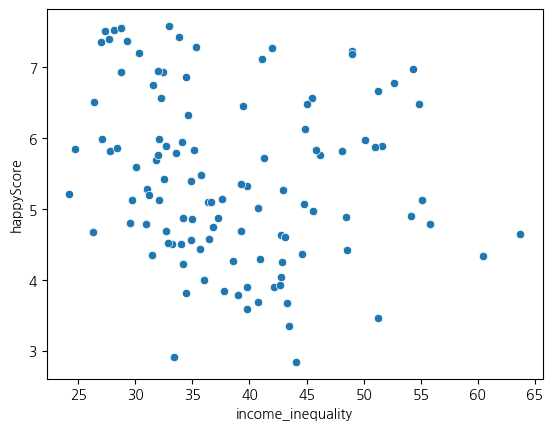

In [84]:
sns.scatterplot(data=data_df,y='happyScore',x='income_inequality')
plt.show()

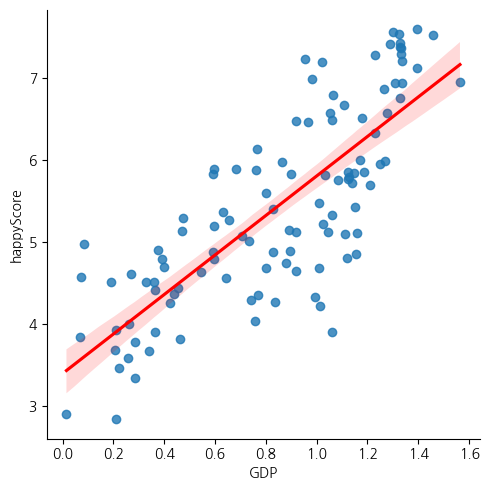

In [85]:
sns.lmplot(x='GDP', y='happyScore', data=data_df, line_kws={'color': 'red'})


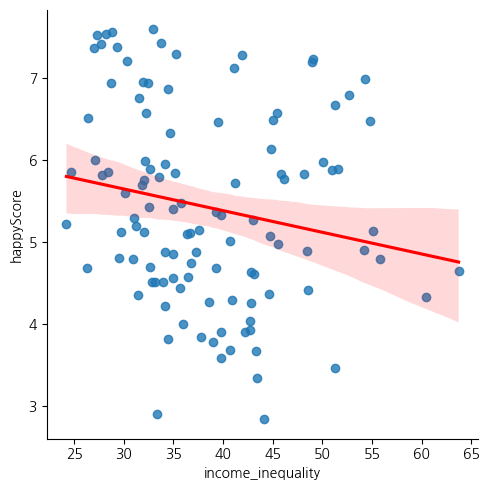

In [86]:
sns.lmplot(x='income_inequality', y='happyScore', data=data_df, line_kws={'color': 'red'})